In [1]:
from pylab import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns 

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load dataset
df = pd.read_csv("/kaggle/input/data-cluster/wine-clustering.csv")
df.head()
df.shape

(178, 13)

## Data Preprocessing #########################################

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

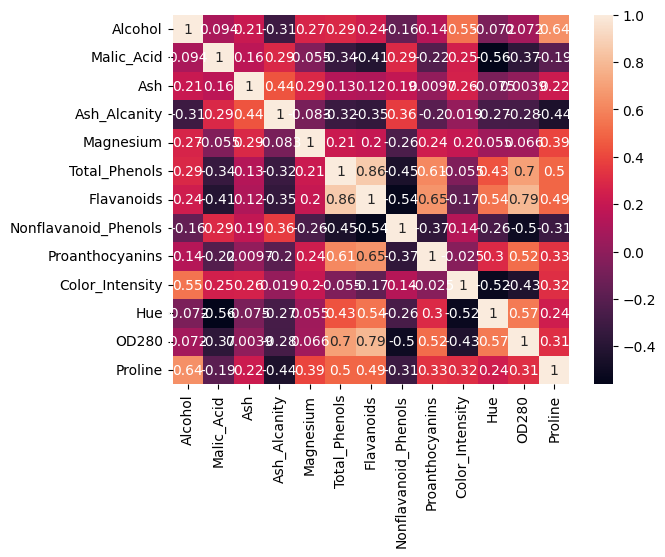

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sdf = scaler.fit_transform(df)
sdf2=pd.DataFrame(sdf)
sdf2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Data Visualizations 

In [9]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

sns.pairplot(df)
plt.show()

# K Means Clustering

In [11]:

from sklearn.cluster import KMeans

model = KMeans(
    n_clusters = 3,
    n_init = 10,   # Centeroid
    random_state = 0 
)
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_data = pca.fit_transform(sdf2)


In [12]:
#train model
model.fit(pca_data)
p_label = model.predict(pca_data)


# Clusters Visualization 

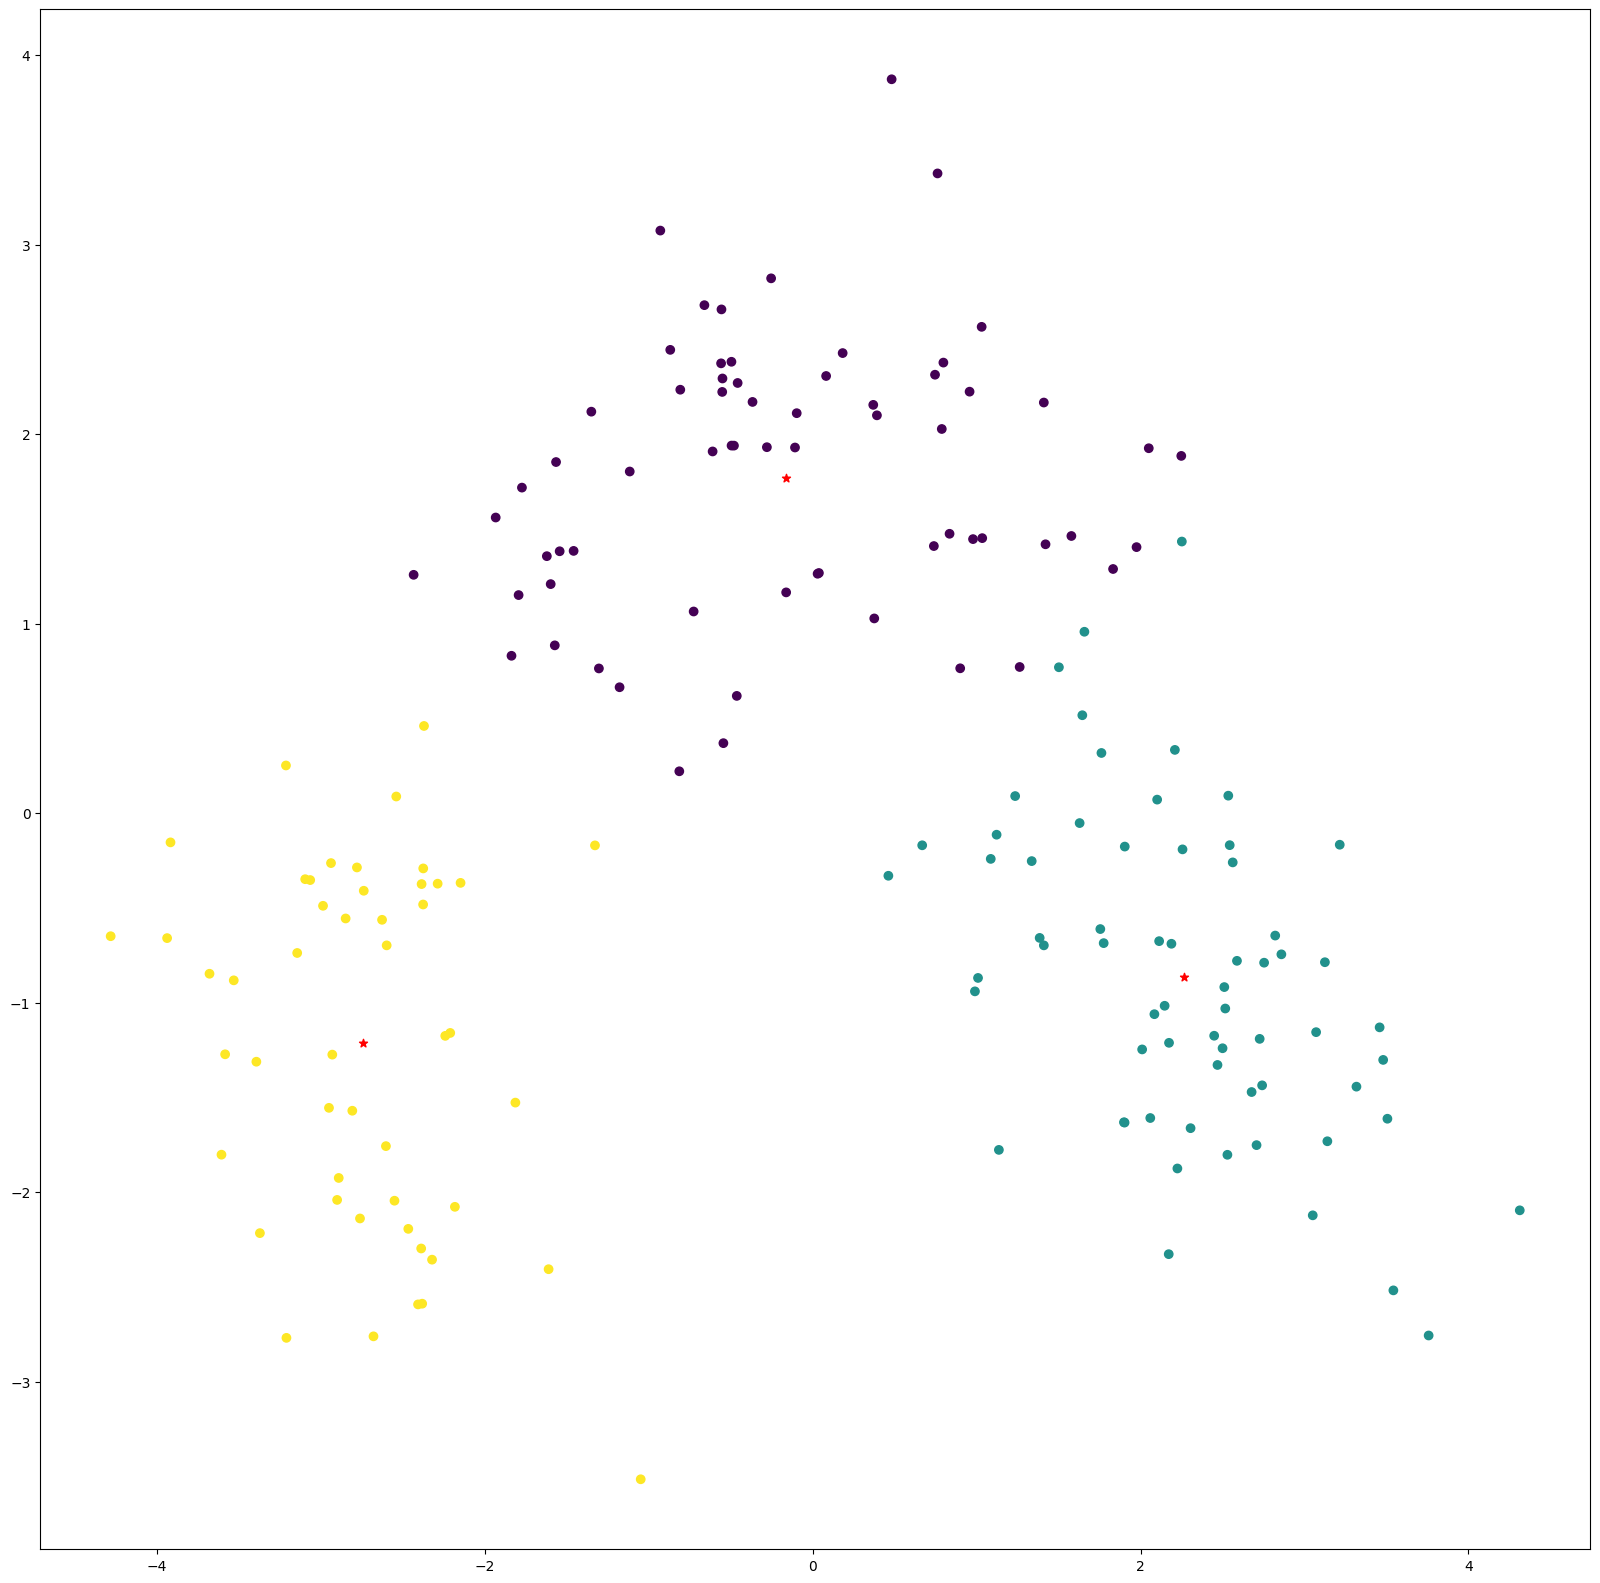

In [13]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=p_label,cmap = 'viridis' )
cluster_centers = model.cluster_centers_

c_x = cluster_centers[:,0]
c_y = cluster_centers[:,1]
plt.scatter(c_x,c_y,marker = '*',c = 'r')
plt.show()

In [14]:
#creating dataframe of reduced dataset
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = p_label
pca_dataframe.sample(10)


,PCA 1,PCA 2,Cluster
31,2.677411,-1.471874,1
84,0.835320,1.473671,0
128,-0.479565,1.938841,0
109,1.578275,1.462034,0
30,2.500220,-1.240834,1
154,-2.737151,-0.409886,2
56,2.741518,-1.436549,1
19,2.084522,-1.061138,1
16,2.171955,-2.327305,1
94,0.957455,2.223528,0


# PCA visualization

<Axes: xlabel='PCA 1', ylabel='PCA 2'>

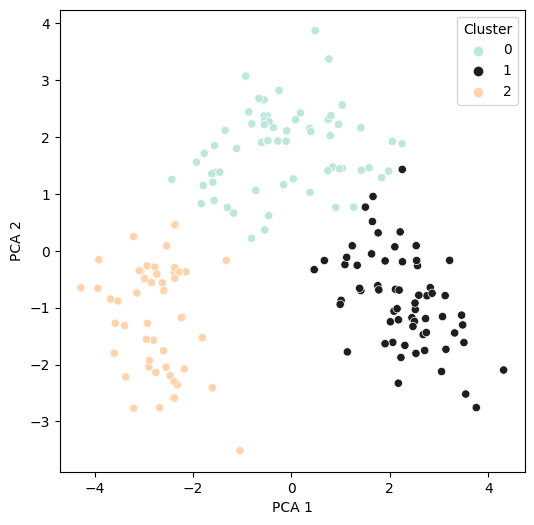

In [15]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = pca_dataframe,x = "PCA 1",y = "PCA 2", hue = 'Cluster',palette = 'icefire')

# GAM Coding and Visualization

In [16]:
gam = GaussianMixture(3)
gam.fit(pca_dataframe)


GaussianMixture(n_components=3)

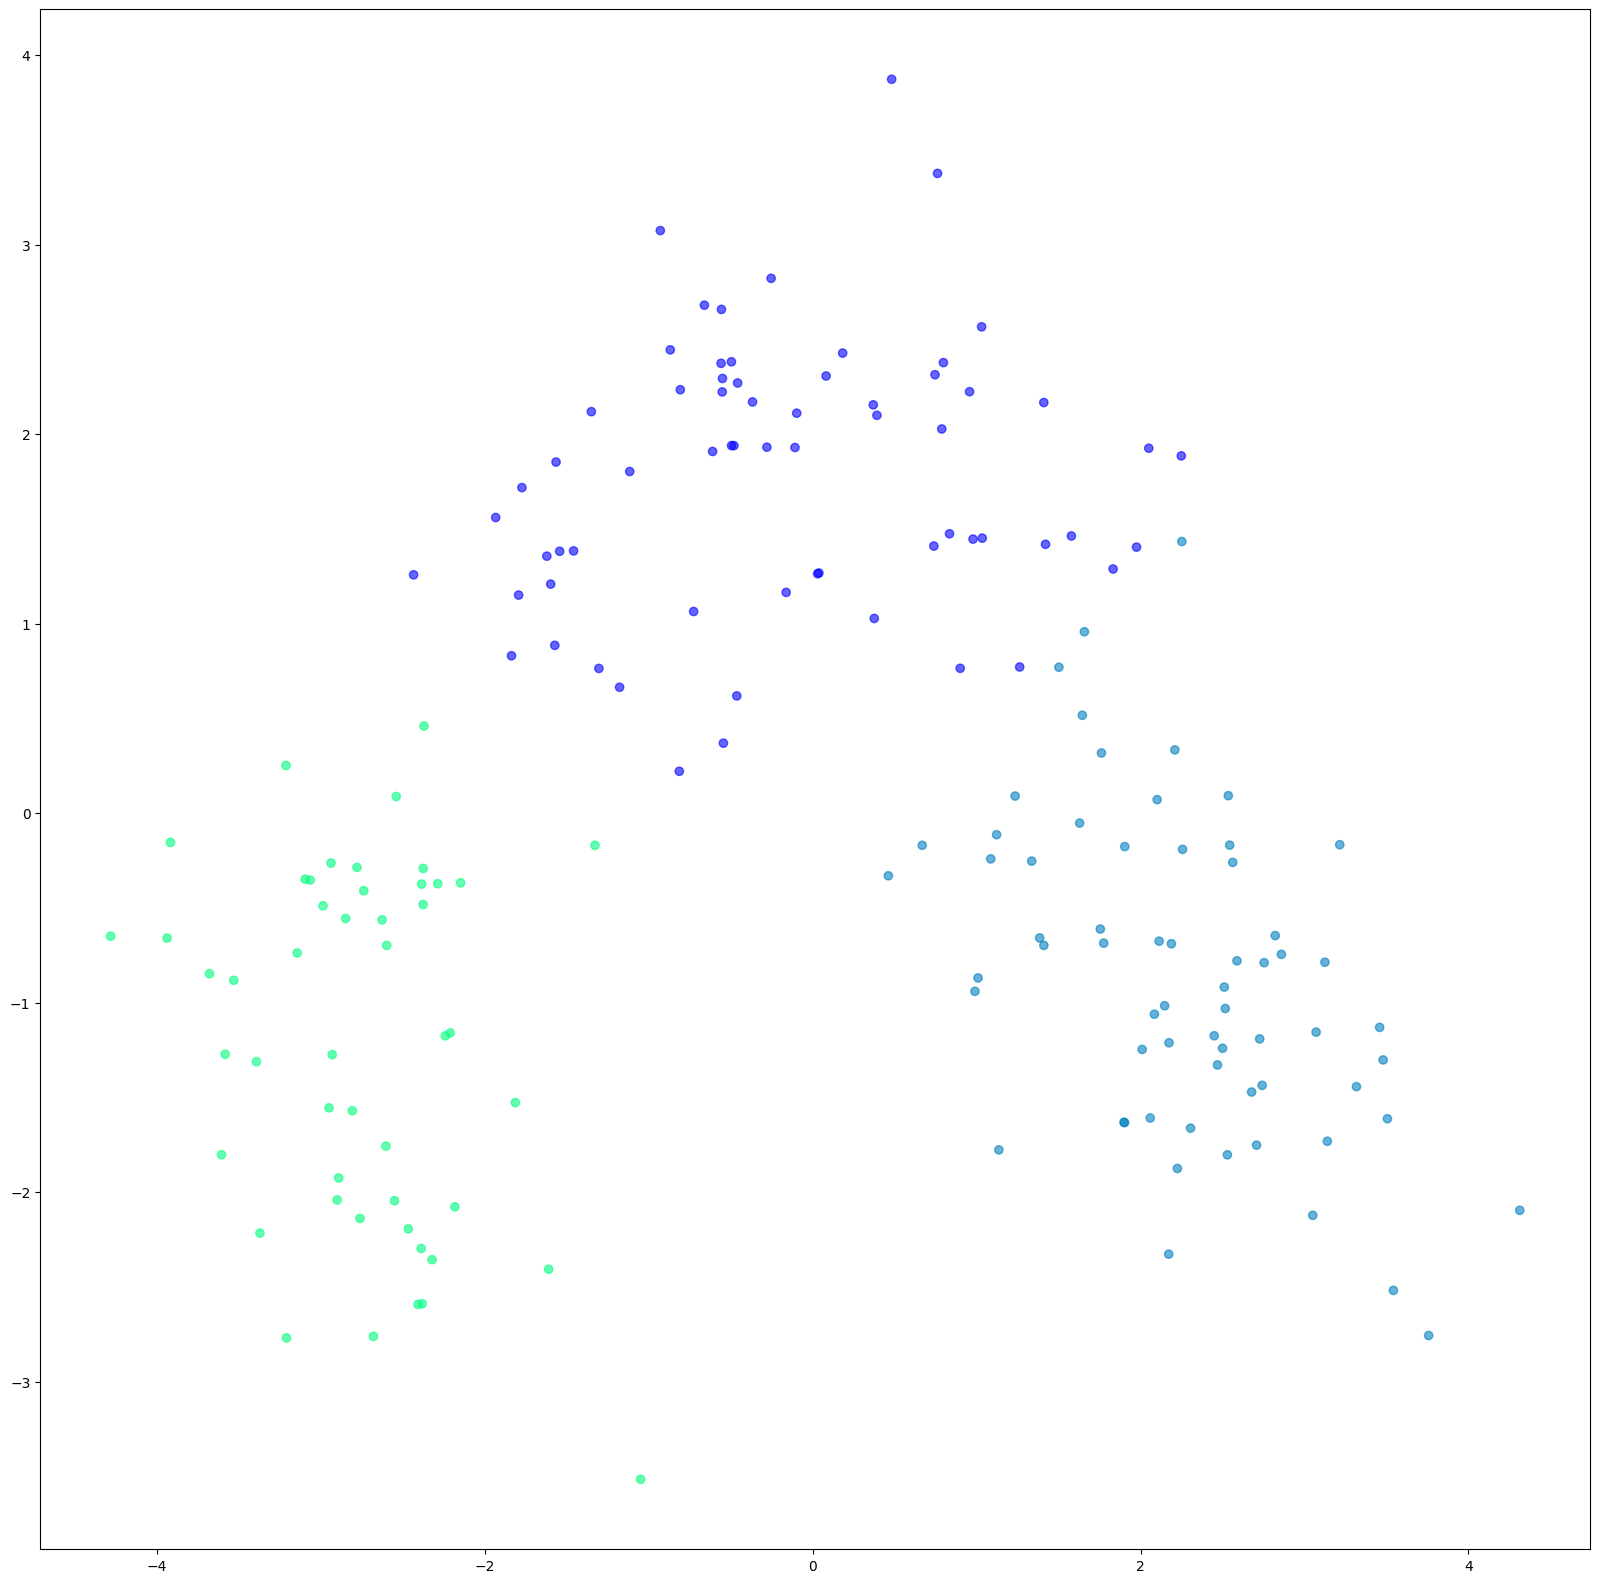

In [17]:
# plot clustering data
plt.scatter(pca_dataframe["PCA 1"],pca_dataframe["PCA 2"],c = GaussianMixture(3).fit_predict(pca_dataframe),cmap = plt.cm.winter,alpha = 0.6)

# Hierarcial Clustaring

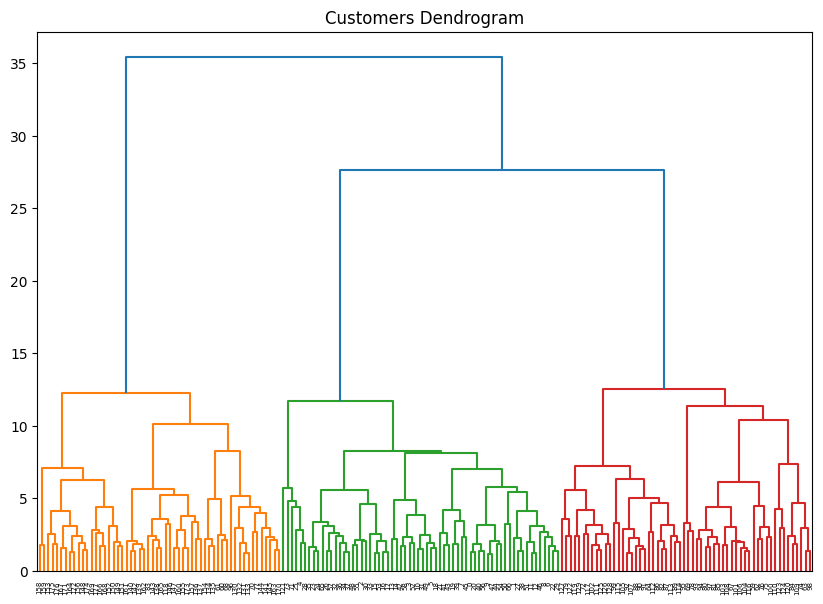

In [18]:

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(sdf2, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [19]:
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(sdf2)
types = clustering_model.fit_predict(sdf2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Clusters dendrogram methods (Single, Complete, Average, Ward)

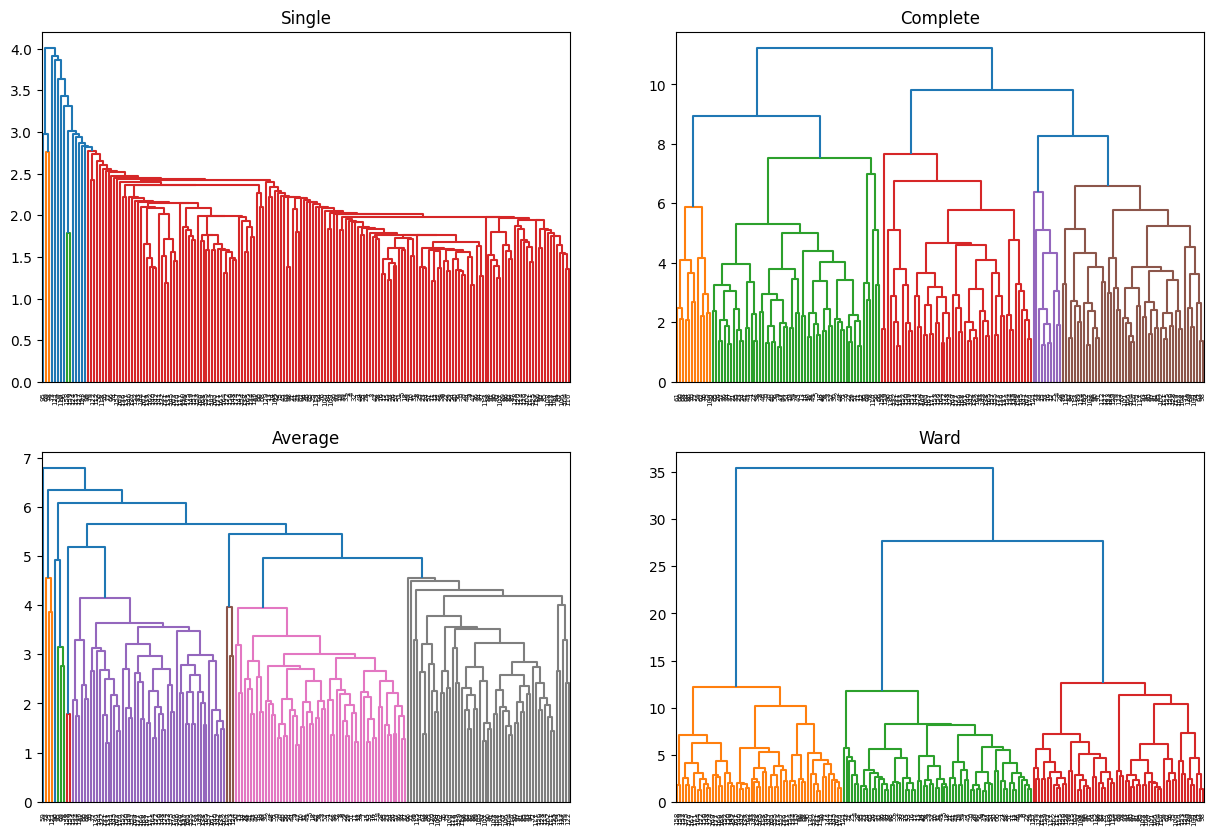

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(sdf2, method='single', metric='euclidean')
Z2 = linkage(sdf2, method='complete', metric='euclidean')
Z3 = linkage(sdf2, method='average', metric='euclidean')
Z4 = linkage(sdf2, method='ward', metric='euclidean')
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

# Results

In [21]:
sdf3 = pd.DataFrame(types)

In [22]:
result_df = pd.concat([sdf3, sdf2], axis=1)

In [23]:
result_df

,0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,2,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,2,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,2,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [24]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(result_df, types)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.31329947453740253
